Long-Short-Term Memory model.


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('seaborn')

 Importing necessary libraries and packages.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving filterQCOM_Totalheadlines_years.csv to filterQCOM_Totalheadlines_years.csv
Saving QCOM.csv to QCOM.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['QCOM.csv']))
Qcom_data=pd.read_csv(io.BytesIO(uploaded['filterQCOM_Totalheadlines_years.csv']))




In [ ]:
Qcom_data = pd.read_csv("filterQCOM_Totalheadlines_years.csv", parse_dates=['Date'])
Qcom_data

,Date,Headlines
0,2015-02-01,What to expect from Apple in 2015 beyond its s...
1,2015-09-01,Samsung is reportedly making a secret new chip...
2,2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...
3,2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...
4,2015-01-28,Apple Inc. Readies Its New Music Service to Ch...
...,...,...
731,2021-05-21,Apple App Store profits look &quot;disproporti...
732,2021-06-06,Facebook&quot;s Trump ban will last at least 2...
733,2021-10-06,Apple announcements at WWDC show augmented rea...
734,2021-06-14,"Cramer's Mad Money Recap: FAANG, Microsoft, Pa..."


In [ ]:

Qcom_data.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [ ]:
Qcom_data.sort_index(inplace=True)

In [ ]:
df = pd.read_csv("QCOM.csv", parse_dates=['Date'])
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$132.89,6717243,$135.105,$135.35,$132.79
1,2021-06-08,$134.2,9657889,$134.06,$135.3895,$133
2,2021-06-07,$133.32,5563253,$133.7,$133.77,$132.64
3,2021-06-04,$134.34,7416675,$132.525,$135.05,$132.2
4,2021-06-03,$131.78,6643997,$132.65,$133.39,$131.42


In [ ]:
df.rename(columns={"Close/Last":"Close"},inplace = True)



In [ ]:
df.sort_values('Date', inplace=True)

In [ ]:
df.reset_index()

,index,Date,Close,Volume,Open,High,Low
0,2515,2011-06-10,$54.6,14524760,$55.7,$55.74,$54.355
1,2514,2011-06-13,$54.4,10670650,$54.79,$54.89,$54.24
2,2513,2011-06-14,$55.58,11995730,$54.87,$55.87,$54.75
3,2512,2011-06-15,$54.1,16748740,$55.23,$55.56,$53.8
4,2511,2011-06-16,$52.99,19440800,$54.12,$54.21,$52.42
...,...,...,...,...,...,...,...
2511,4,2021-06-03,$131.78,6643997,$132.65,$133.39,$131.42
2512,3,2021-06-04,$134.34,7416675,$132.525,$135.05,$132.2
2513,2,2021-06-07,$133.32,5563253,$133.7,$133.77,$132.64
2514,1,2021-06-08,$134.2,9657889,$134.06,$135.3895,$133


In [ ]:
df.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

Merging of headline and historical dataset.

In [ ]:
data = pd.merge(Qcom_data, df, how='inner', on=['Date'])

In [ ]:
data

,Date,Headlines,Close,Volume,Open,High,Low
0,2015-09-01,Samsung is reportedly making a secret new chip...,$55.02,13123390,$55.25,$55.911,$54.69
1,2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...,$72.48,11725560,$71.75,$73.21,$71.18
2,2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...,$71.59,16990240,$70.28,$72.61,$69.95
3,2015-01-28,Apple Inc. Readies Its New Music Service to Ch...,$70.99,15578410,$72.5,$72.5,$70.85
4,2015-01-29,The feature film that blew away everyone at S...,$63.69,47077720,$65.51,$65.69,$62.47
...,...,...,...,...,...,...,...
579,2021-04-27,"Belvedere Trading LLC Buys Apple Inc, S&P 500 ...",$138.01,9284499,$138.71,$139.38,$136.98
580,2021-04-28,Apple profit soars in latest quarter on higher...,$136.57,13118140,$138.17,$138.2731,$135.75
581,2021-04-29,"Apple (NASDAQ:AAPL) Posts Earnings Results, B...",$142.68,20502140,$145.01,$145.2965,$140.67
582,2021-05-14,"US stocks surge in recovery; dollar, bond yiel...",$130.15,9391122,$128.63,$131.42,$127.81


In [ ]:
data["Close"] = data["Close"].str.replace('$', '').astype(float)
data["Open"] = data["Open"].str.replace('$', '').astype(float)
data["High"] = data["High"].str.replace('$', '').astype(float)
data["Low"] = data["Low"].str.replace('$', '').astype(float)

Typecasting object data to float data.

In [ ]:
data.head()

,Date,Headlines,Close,Volume,Open,High,Low
0,2015-09-01,Samsung is reportedly making a secret new chip...,55.02,13123390,55.25,55.911,54.69
1,2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...,72.48,11725560,71.75,73.210,71.18
2,2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...,71.59,16990240,70.28,72.610,69.95
3,2015-01-28,Apple Inc. Readies Its New Music Service to Ch...,70.99,15578410,72.50,72.500,70.85
4,2015-01-29,The feature film that blew away everyone at S...,63.69,47077720,65.51,65.690,62.47


In [ ]:
data.set_index("Date", inplace = True)
data.head()

,Headlines,Close,Volume,Open,High,Low
Date,,,,,,
2015-09-01,Samsung is reportedly making a secret new chip...,55.02,13123390,55.25,55.911,54.69
2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...,72.48,11725560,71.75,73.210,71.18
2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...,71.59,16990240,70.28,72.610,69.95
2015-01-28,Apple Inc. Readies Its New Music Service to Ch...,70.99,15578410,72.50,72.500,70.85
2015-01-29,The feature film that blew away everyone at S...,63.69,47077720,65.51,65.690,62.47


In [ ]:
data.sort_index(ascending=True,inplace=True)
data.head()

,Headlines,Close,Volume,Open,High,Low
Date,,,,,,
2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...,72.48,11725560,71.75,73.21,71.18
2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...,71.59,16990240,70.28,72.61,69.95
2015-01-28,Apple Inc. Readies Its New Music Service to Ch...,70.99,15578410,72.50,72.50,70.85
2015-01-29,The feature film that blew away everyone at S...,63.69,47077720,65.51,65.69,62.47
2015-01-30,Samsung Group (SSNLF) To Mantain Delicate Bala...,62.46,26395180,63.04,64.01,62.39


In [ ]:
data.shape

(584, 6)

Contains 584 observations and 6 attributes.

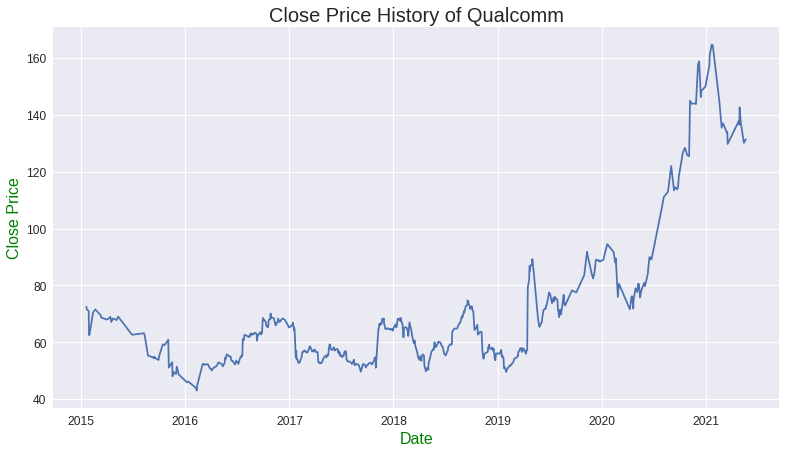

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Close Price History of Qualcomm', fontsize = 20)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Sentiment Analysis(NLP).
identify and extract opinions within a given text across blogs, reviews, social media, forums, news etc.

In [ ]:
import os

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/drive')

Mounted at /drive


In [ ]:
data.to_csv('/drive/My Drive/csv_fromcolab/NewsandHistoricaldata.csv')

In [ ]:
files.download('/drive/My Drive/csv_fromcolab/NewsandHistoricaldata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Appended the merged data to a csv file.

In [ ]:
os.getcwd()

'/content'

Returns current directory .

In [ ]:
data['compound'] = ''
data['negative'] = ''
data['neutral'] = ''
data['positive'] = ''
data.head()

,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...,72.48,11725560,71.75,73.21,71.18,,,,
2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...,71.59,16990240,70.28,72.61,69.95,,,,
2015-01-28,Apple Inc. Readies Its New Music Service to Ch...,70.99,15578410,72.50,72.50,70.85,,,,
2015-01-29,The feature film that blew away everyone at S...,63.69,47077720,65.51,65.69,62.47,,,,
2015-01-30,Samsung Group (SSNLF) To Mantain Delicate Bala...,62.46,26395180,63.04,64.01,62.39,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

NLTK’s built-in Vader Sentiment Analyzer will simply rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words.



In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata


sid = SentimentIntensityAnalyzer()

data['compound'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['negative'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
data['neutral'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
data['positive'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])


data.head()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...,72.48,11725560,71.75,73.21,71.18,0.8979,0.067,0.851,0.082
2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...,71.59,16990240,70.28,72.61,69.95,0.9905,0.031,0.871,0.098
2015-01-28,Apple Inc. Readies Its New Music Service to Ch...,70.99,15578410,72.50,72.50,70.85,0.9984,0.031,0.834,0.135
2015-01-29,The feature film that blew away everyone at S...,63.69,47077720,65.51,65.69,62.47,0.9945,0.048,0.845,0.108
2015-01-30,Samsung Group (SSNLF) To Mantain Delicate Bala...,62.46,26395180,63.04,64.01,62.39,0.9962,0.050,0.800,0.150


In [ ]:
data['label'] = 0
data.loc[data['compound'] > 0.2, 'label'] = 1
data.loc[data['compound'] < -0.2, 'label'] = -1
data

,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive,label
Date,,,,,,,,,,,
2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...,72.48,11725560,71.75,73.2100,71.18,0.8979,0.067,0.851,0.082,1
2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...,71.59,16990240,70.28,72.6100,69.95,0.9905,0.031,0.871,0.098,1
2015-01-28,Apple Inc. Readies Its New Music Service to Ch...,70.99,15578410,72.50,72.5000,70.85,0.9984,0.031,0.834,0.135,1
2015-01-29,The feature film that blew away everyone at S...,63.69,47077720,65.51,65.6900,62.47,0.9945,0.048,0.845,0.108,1
2015-01-30,Samsung Group (SSNLF) To Mantain Delicate Bala...,62.46,26395180,63.04,64.0100,62.39,0.9962,0.050,0.800,0.150,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-28,Apple profit soars in latest quarter on higher...,136.57,13118140,138.17,138.2731,135.75,0.9988,0.043,0.822,0.134,1
2021-04-29,"Apple (NASDAQ:AAPL) Posts Earnings Results, B...",142.68,20502140,145.01,145.2965,140.67,0.9980,0.065,0.810,0.125,1
2021-05-03,2 Cheap Stocks Under $25 to Buy that Shrugged ...,137.43,7920307,139.70,139.7600,136.87,0.9926,0.039,0.850,0.111,1


In [ ]:
data.drop(['label'], axis = 1)

,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...,72.48,11725560,71.75,73.2100,71.18,0.8979,0.067,0.851,0.082
2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...,71.59,16990240,70.28,72.6100,69.95,0.9905,0.031,0.871,0.098
2015-01-28,Apple Inc. Readies Its New Music Service to Ch...,70.99,15578410,72.50,72.5000,70.85,0.9984,0.031,0.834,0.135
2015-01-29,The feature film that blew away everyone at S...,63.69,47077720,65.51,65.6900,62.47,0.9945,0.048,0.845,0.108
2015-01-30,Samsung Group (SSNLF) To Mantain Delicate Bala...,62.46,26395180,63.04,64.0100,62.39,0.9962,0.050,0.800,0.150
...,...,...,...,...,...,...,...,...,...,...
2021-04-28,Apple profit soars in latest quarter on higher...,136.57,13118140,138.17,138.2731,135.75,0.9988,0.043,0.822,0.134
2021-04-29,"Apple (NASDAQ:AAPL) Posts Earnings Results, B...",142.68,20502140,145.01,145.2965,140.67,0.9980,0.065,0.810,0.125
2021-05-03,2 Cheap Stocks Under $25 to Buy that Shrugged ...,137.43,7920307,139.70,139.7600,136.87,0.9926,0.039,0.850,0.111


In [ ]:
data.columns

Index(['Headlines', 'Close', 'Volume', 'Open', 'High', 'Low', 'compound',
       'negative', 'neutral', 'positive', 'label'],
      dtype='object')

In [ ]:
data = data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-20,72.48,0.8979,0.067,0.851,0.082,71.75,73.21,71.18,11725560
2015-01-21,71.59,0.9905,0.031,0.871,0.098,70.28,72.61,69.95,16990240
2015-01-28,70.99,0.9984,0.031,0.834,0.135,72.50,72.50,70.85,15578410
2015-01-29,63.69,0.9945,0.048,0.845,0.108,65.51,65.69,62.47,47077720
2015-01-30,62.46,0.9962,0.050,0.800,0.150,63.04,64.01,62.39,26395180


In [ ]:
stockdata=data.to_csv('stockdata.csv')

In [ ]:
stockdata = pd.read_csv('stockdata.csv', index_col = False)

stockdata.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

stockdata.set_index('Date', inplace=True)

stockdata.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-20,72.48,0.8979,0.067,0.851,0.082,71.75,73.21,71.18,11725560
2015-01-21,71.59,0.9905,0.031,0.871,0.098,70.28,72.61,69.95,16990240
2015-01-28,70.99,0.9984,0.031,0.834,0.135,72.50,72.50,70.85,15578410
2015-01-29,63.69,0.9945,0.048,0.845,0.108,65.51,65.69,62.47,47077720
2015-01-30,62.46,0.9962,0.050,0.800,0.150,63.04,64.01,62.39,26395180


In [ ]:
stockdata.shape

(584, 9)

In [ ]:
stockdata.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stockdata.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,67.510736,0.658733,0.059315,0.839613,0.101098,67.564268,68.336015,66.738306,1.307141e+07
std,21.293442,0.666480,0.028063,0.035549,0.028972,21.320232,21.629966,20.959987,1.113179e+07
min,43.000000,-0.999500,0.000000,0.697000,0.035000,42.510000,43.290000,42.240000,2.435244e+06
25%,54.972500,0.857700,0.040000,0.818000,0.080000,55.037500,55.515000,54.530000,7.539116e+06
50%,62.125000,0.981000,0.055000,0.842500,0.099000,61.855000,62.465000,61.342500,1.030630e+07
75%,70.157500,0.993500,0.072000,0.864000,0.119000,69.977500,71.382475,69.227500,1.429837e+07
max,164.750000,0.999600,0.236000,0.951000,0.207000,165.805000,167.045000,163.340000,1.559539e+08


In [ ]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 2015-01-20 to 2021-05-21
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     584 non-null    float64
 1   compound  584 non-null    float64
 2   negative  584 non-null    float64
 3   neutral   584 non-null    float64
 4   positive  584 non-null    float64
 5   Open      584 non-null    float64
 6   High      584 non-null    float64
 7   Low       584 non-null    float64
 8   Volume    584 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 45.6+ KB


In [ ]:
close_price = stockdata.iloc[:,0] 
print("Close Price:")
close_price

Close Price:


Date
2015-01-20     72.48
2015-01-21     71.59
2015-01-28     70.99
2015-01-29     63.69
2015-01-30     62.46
               ...  
2021-04-28    136.57
2021-04-29    142.68
2021-05-03    137.43
2021-05-14    130.15
2021-05-21    131.46
Name: Close, Length: 584, dtype: float64

In [ ]:
need_data = pd.concat([close_price], axis=1)
need_data.columns = ['close_price']  
need_data.tail(10)

,close_price
Date,
2021-03-02,137.04
2021-03-16,133.65
2021-03-17,133.92
2021-03-18,129.75
2021-04-27,138.01
2021-04-28,136.57
2021-04-29,142.68
2021-05-03,137.43
2021-05-14,130.15


In [ ]:
dataset = need_data.values

In [ ]:
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

468

The math.ceil() method rounds a number up to the nearest integer, if necessary, and returns the result.





Scale and fit data.
For optimal performance.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.24213552]
 [0.23482546]
 [0.22989733]
 [0.1699384 ]
 [0.15983573]
 [0.19178645]
 [0.2249692 ]
 [0.23425051]
 [0.21659138]
 [0.21059548]
 [0.2050924 ]
 [0.2113347 ]
 [0.21330595]
 [0.19806982]
 [0.20813142]
 [0.20377823]
 [0.21396304]
 [0.1611499 ]
 [0.16550308]
 [0.16082136]
 [0.10086242]
 [0.0987269 ]
 [0.09577002]
 [0.09289528]
 [0.09749487]
 [0.09404517]
 [0.08813142]
 [0.09913758]
 [0.13355236]
 [0.13141684]
 [0.13117043]
 [0.14677618]
 [0.06628337]
 [0.08024641]
 [0.08197125]
 [0.04106776]
 [0.04427105]
 [0.05437372]
 [0.04755647]
 [0.06899384]
 [0.04574949]
 [0.02361396]
 [0.02521561]
 [0.02546201]
 [0.00731006]
 [0.        ]
 [0.01281314]
 [0.07704312]
 [0.07408624]
 [0.07572895]
 [0.07564682]
 [0.06316222]
 [0.05806982]
 [0.06258727]
 [0.06570842]
 [0.0712115 ]
 [0.08131417]
 [0.075154  ]
 [0.06989733]
 [0.08016427]
 [0.09462012]
 [0.09182752]
 [0.10464066]
 [0.09765914]
 [0.09839836]
 [0.08895277]
 [0.08443532]
 [0.08558522]
 [0.0749076 ]
 [0.08665298]
 [0.07696099]
 [0.09

 normalize the dataset

Training dataset.

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []
past_days = 20
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, :])
    y_train.append(train_data[i, 0])
    if i<= past_days:
        print(x_train)
        print(y_train)
        print()

[array([[0.24213552],
       [0.23482546],
       [0.22989733],
       [0.1699384 ],
       [0.15983573],
       [0.19178645],
       [0.2249692 ],
       [0.23425051],
       [0.21659138],
       [0.21059548],
       [0.2050924 ],
       [0.2113347 ],
       [0.21330595],
       [0.19806982],
       [0.20813142],
       [0.20377823],
       [0.21396304],
       [0.1611499 ],
       [0.16550308],
       [0.16082136]])]
[0.10086242299794662]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

reshape input to be [samples, time steps, features]

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.24213552],
        [0.23482546],
        [0.22989733],
        ...,
        [0.1611499 ],
        [0.16550308],
        [0.16082136]],

       [[0.23482546],
        [0.22989733],
        [0.1699384 ],
        ...,
        [0.16550308],
        [0.16082136],
        [0.10086242]],

       [[0.22989733],
        [0.1699384 ],
        [0.15983573],
        ...,
        [0.16082136],
        [0.10086242],
        [0.0987269 ]],

       ...,

       [[0.12057495],
        [0.10595483],
        [0.10595483],
        ...,
        [0.21609856],
        [0.20743326],
        [0.18373717]],

       [[0.10595483],
        [0.10595483],
        [0.11457906],
        ...,
        [0.20743326],
        [0.18373717],
        [0.18694045]],

       [[0.10595483],
        [0.11457906],
        [0.11646817],
        ...,
        [0.18373717],
        [0.18694045],
        [0.19728953]]])

Convert into a 3D array.

In [ ]:
print(x_train.shape)
print(y_train.shape)

(448, 20, 1)
(448,)


Building model.

In [ ]:
import keras.models
import tensorflow as tf
tf.random.set_seed(0)
model = Sequential()
model.add(LSTM(160, return_sequences=True, activation = "tanh", input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences= False, activation = "tanh"))
model.add(Dense(60))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20, 160)           103680    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 160)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                77120     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 185,721
Trainable params: 185,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

Adaptive Moment Estimation .
optimization technique for gradient descent.

EarlyStopping callback allows to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1,patience = 5)
history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, verbose = 1, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/100
6/6 [==============================] - 5s 287ms/step - loss: 0.0097 - val_loss: 0.0049
Epoch 2/100
6/6 [==============================] - 1s 86ms/step - loss: 0.0021 - val_loss: 0.0060
Epoch 3/100
6/6 [==============================] - 1s 89ms/step - loss: 0.0015 - val_loss: 0.0044
Epoch 4/100
6/6 [==============================] - 1s 86ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 5/100
6/6 [==============================] - 1s 90ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 6/100
6/6 [==============================] - 1s 87ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 7/100
6/6 [==============================] - 1s 90ms/step - loss: 9.3800e-04 - val_loss: 0.0037
Epoch 8/100
6/6 [==============================] - 1s 85ms/step - loss: 8.9183e-04 - val_loss: 0.0036
Epoch 9/100
6/6 [==============================] - 1s 87ms/step - loss: 8.1213e-04 - val_loss: 0.0035
Epoch 10/100
6/6 [==============================] - 1s 86ms/step - loss: 6.7119e-04 - val_loss: 0.0034
Ep

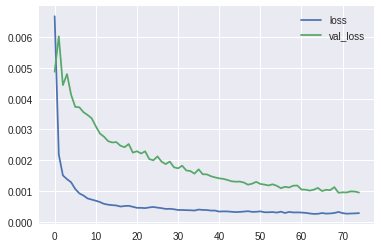

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

val_loss starts decreasing, means model built is learning and working fine.

Predicting Future Stock using the Test Set

In [ ]:
test_data = scaled_data[training_data_len - past_days: , :]
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, :])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

convert array to dataset matrix.reshape input to be [samples, time steps, features]

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions

array([[ 63.889828],
       [ 65.951355],
       [ 68.342476],
       [ 69.86124 ],
       [ 70.6787  ],
       [ 70.76206 ],
       [ 70.88676 ],
       [ 70.946526],
       [ 71.8979  ],
       [ 73.27753 ],
       [ 74.88439 ],
       [ 75.54436 ],
       [ 74.29637 ],
       [ 72.82981 ],
       [ 72.746284],
       [ 72.62449 ],
       [ 73.24237 ],
       [ 73.6341  ],
       [ 73.55023 ],
       [ 72.60689 ],
       [ 70.8839  ],
       [ 69.55535 ],
       [ 67.94628 ],
       [ 68.06085 ],
       [ 68.096375],
       [ 71.04043 ],
       [ 72.541435],
       [ 72.61151 ],
       [ 74.340614],
       [ 75.62929 ],
       [ 78.820244],
       [ 84.98966 ],
       [ 89.70257 ],
       [ 91.20861 ],
       [ 90.74018 ],
       [ 88.48073 ],
       [ 86.4277  ],
       [ 83.820526],
       [ 82.12559 ],
       [ 81.0512  ],
       [ 80.71324 ],
       [ 80.35809 ],
       [ 80.768364],
       [ 83.60547 ],
       [ 86.08335 ],
       [ 87.19719 ],
       [ 87.3989  ],
       [ 86.9

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  2.555539152211158


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

make and invert predictions.

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

58.80857348845831

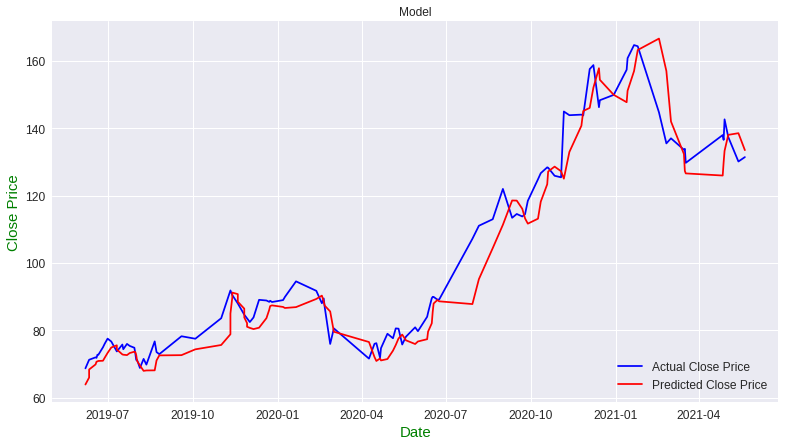

In [ ]:
import copy
valid = copy.deepcopy(data[training_data_len:])
valid['Predictions'] = predictions
plt.figure(figsize=(13,7))
plt.title('Model')
plt.xlabel('Date', fontsize= 15, color = 'g')
plt.ylabel('Close Price', fontsize = 15, color = 'g')
plt.plot(valid['Close'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'],  color = 'red', label = 'Predicted Close Price')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
valid[['Close', 'Predictions']]

,Close,Predictions
Date,,
2019-06-07,68.69,63.889828
2019-06-11,71.24,65.951355
2019-06-11,71.24,68.342476
2019-06-18,71.96,69.861237
2019-06-19,71.80,70.678703
...,...,...
2021-04-28,136.57,129.949341
2021-04-29,142.68,133.308975
2021-05-03,137.43,138.065598


In [ ]:
import datetime
last_day = data.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-05-22 00:00:00


In [ ]:
new_df = data.filter(['Close'])
last_20_days = new_df[-20: ].values
last_20_days_scaled = scaler.transform(last_20_days)

X_test = []
X_test.append(last_20_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print('Predicted Close Price for {} '.format(next_day) + ' = ', pred_price)

Predicted Close Price for 2021-05-22 00:00:00  =  [[129.21437]]


In [ ]:
previous = pred_price
previous_pred_price = new_df.at[str(last_day), 'Close']

In [ ]:
diff=(float)(pred_price - previous_pred_price)
if(diff < 0):
  print("percentage decrease = ",round(((- (diff)/previous_pred_price)*100),4))
else:
  print("percentage increase = ",round((( (diff)/previous_pred_price)*100),4))

percentage decrease =  1.7082


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


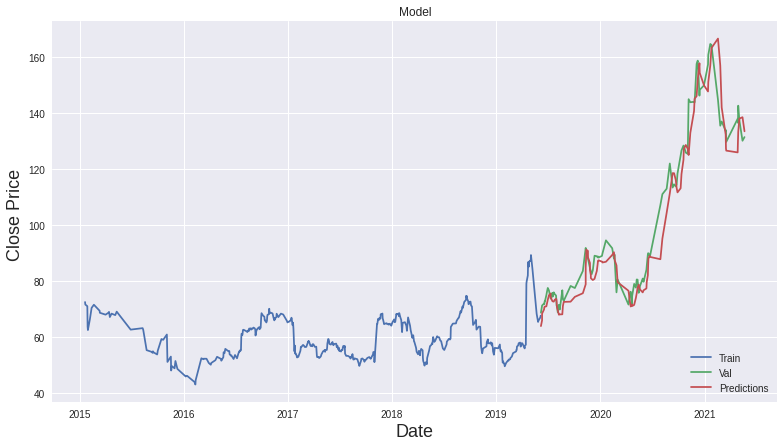

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(13,7))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>